# Flocs Data Demo

## How to Export Data

Both static and collected data can be exported by command `make export-data-to-csv`.
This command creates CSV tables for all models registered in `flocs/management/commands/export_data_to_csv.py`
into directory `exported-data/<datestamp>/`. If there is a need to change what data for a model are exported, modify its `export_class` attribute (namedtuple) and `to_export_tuple` method.

## Tables

There are following CSV tables:
- static data: `concepts.csv`, `blocks.csv`, `instructions.csv`, `tasks.csv`
- collected data: `students.csv`, `task-instances.csv`, `attempts.csv`

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Concepts

In [98]:
concepts = pd.read_csv('data/concepts.csv')
concepts.head()

,concept_id,name,type
0,1,BLOCK_MOVE,block
1,2,BLOCK_TURN,block
2,3,BLOCK_REPEAT,block
3,4,BLOCK_WHILE,block
4,5,BLOCK_CHECK_GOAL,block


### Blocks

In [99]:
blocks = pd.read_csv('data/blocks.csv')
blocks.head()

,block_id,identifier,name
0,1,maze_move_forward,Step forward
1,2,maze_turn,Turn
2,3,controls_repeat_ext,Repeat N-times
3,4,controls_while,Loop while
4,5,maze_check_goal,Check goal


### Instructions

In [100]:
instructions = pd.read_csv('data/instructions.csv')
instructions.head()

,instruction_id,concept_id,order,text
0,11,11,110,Your task is to get the robot to the treasure ...
1,12,12,120,Here is a toolbox for your blocks. If you do w...
2,13,13,130,Create your programs in this window. Connect y...
3,14,14,140,Drag the blocks from your toolbox with the mou...
4,15,15,150,As soon as you are satisfied with your program...


### Tasks

In [101]:
tasks = pd.read_csv('data/tasks.csv')
tasks.head(3)

,task_id,title,level,concepts_ids,blocks_ids,maze_settings,solution
0,1,Three steps forward,1,"[1, 11, 12, 13, 14, 15, 20]",[1],"{ ""grid"": [ [1, 1, 1, 1, 1, 1, 1, 1]...","<xml xmlns=""http://www.w3.org/1999/xhtml""><blo..."
1,2,Zig-zag,2,"[1, 2, 11, 12, 13, 14, 15, 20]","[1, 2]","{ ""grid"": [ [1, 1, 1, 1, 1, 1, 1, 1]...","<xml xmlns=""http://www.w3.org/1999/xhtml""><blo..."
2,3,Right turn,2,"[1, 2, 11, 12, 13, 14, 15, 20]","[1, 2]","{ ""grid"": [ [1, 1, 1, 1, 1, 1, 1, 1]...","<xml xmlns=""http://www.w3.org/1999/xhtml""><blo..."


### Students

In [102]:
students = pd.read_csv('data/students.csv')
students.head()

,student_id,credits,blocks_ids,level,seen_concepts_ids
0,139,153,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


### Task Instances

In [163]:
task_instances = pd.read_csv('data/task-instances.csv')
task_instances.head()

,task_instance_id,student_id,task_id,time_start,time_end,time_spent,solved,given_up,attempts,reported_flow,instructions_ids,blocks_ids,session_order
0,81,139,1,2016-06-06 03:50:07.529535,2016-06-06 03:50:16.257236,9,True,False,1,RIGHT,"[11, 12, 13, 14, 15, 1]",[1],1
1,82,139,2,2016-06-06 03:50:22.507381,2016-06-06 03:50:43.922838,21,True,False,2,EASY,[2],"[1, 2]",2
2,83,139,11,2016-06-06 03:50:49.864074,NaN,0,False,False,0,UNKNOWN,"[16, 3]","[1, 2, 3]",3
3,84,139,16,2016-06-08 13:34:49.402501,2016-06-08 13:38:22.049144,22,True,False,1,RIGHT,"[16, 3]","[1, 2, 3]",1
4,85,139,20,2016-06-08 13:38:26.200680,2016-06-08 13:39:04.174768,38,True,False,3,RIGHT,[],"[1, 2, 3, 4, 5]",2


### Attempts

In [104]:
attempts = pd.read_csv('data/attempts.csv')
attempts.head()

,attempt_id,task_instance_id,order,time,success,code
0,1,81,1,2016-06-06 03:50:17.175332,True,"<xml xmlns=""http://www.w3.org/1999/xhtml""><blo..."
1,2,82,1,2016-06-06 03:50:32.833278,False,"<xml xmlns=""http://www.w3.org/1999/xhtml""><blo..."
2,3,82,2,2016-06-06 03:50:44.425691,True,"<xml xmlns=""http://www.w3.org/1999/xhtml""><blo..."
3,4,84,1,2016-06-08 13:38:22.709923,True,"<xml xmlns=""http://www.w3.org/1999/xhtml""><blo..."
4,5,85,1,2016-06-08 13:38:49.718076,False,"<xml xmlns=""http://www.w3.org/1999/xhtml""><blo..."


## Analysis Example

Problem: Find median of a task solving time for each programming concept.

In [105]:
programming_concepts = concepts[concepts.type == 'programming']
programming_concepts

,concept_id,name,type
19,20,PROGRAMMING_SEQUENCE,programming
20,21,PROGRAMMING_REPEAT,programming
21,22,PROGRAMMING_WHILE,programming
22,23,PROGRAMMING_IF,programming
23,24,PROGRAMMING_LOGIC,programming


In [168]:
solved_instances = task_instances[task_instances.solved]
instances_concepts = pd.merge(solved_instances, tasks, on='task_id')[['time_spent', 'concepts_ids']]
instances_concepts.head()

,time_spent,concepts_ids
0,9,"[1, 11, 12, 13, 14, 15, 20]"
1,21,"[1, 2, 11, 12, 13, 14, 15, 20]"
2,22,"[1, 2, 3, 11, 12, 13, 14, 15, 16, 20, 21]"
3,38,"[1, 2, 3, 11, 12, 13, 14, 15, 16, 20, 21]"
4,43,"[1, 2, 3, 11, 12, 13, 14, 15, 16, 20, 21]"


In [169]:
# unpack concepts IDs
from ast import literal_eval
concepts_lists = [literal_eval(c) for c in instances_concepts.concepts_ids]
times = instances_concepts.time_spent
concepts_times = pd.DataFrame([(times[i], concept_id)
                              for i, concepts_list in enumerate(concepts_lists)
                              for concept_id in concepts_list],
                              columns=['time', 'concept_id'])
concepts_times.head()
# (If you know how to do this better (ideally function to unpack any column), let mi know.)

,time,concept_id
0,9,1
1,9,11
2,9,12
3,9,13
4,9,14


In [170]:
# filter programming concepts
programming_concepts_times = pd.merge(concepts_times, programming_concepts)
programming_concepts_times.head()

,time,concept_id,name,type
0,9,20,PROGRAMMING_SEQUENCE,programming
1,21,20,PROGRAMMING_SEQUENCE,programming
2,22,20,PROGRAMMING_SEQUENCE,programming
3,38,20,PROGRAMMING_SEQUENCE,programming
4,43,20,PROGRAMMING_SEQUENCE,programming


In [171]:
# calculate median for each programming concept
medians = programming_concepts_times.groupby(['concept_id', 'name']).median()
medians

,,time
concept_id,name,
20,PROGRAMMING_SEQUENCE,38.5
21,PROGRAMMING_REPEAT,24.0
22,PROGRAMMING_WHILE,63.0
23,PROGRAMMING_IF,78.0
24,PROGRAMMING_LOGIC,83.0


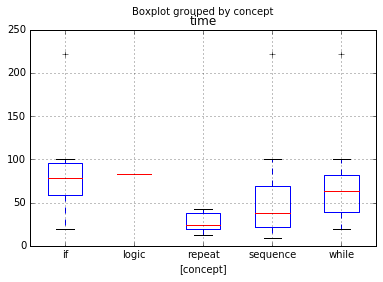

In [186]:
# plot
programming_concepts_times['concept'] = programming_concepts_times['name'].apply(lambda x: x.split('_')[-1].lower())
programming_concepts_times[['concept', 'time']].boxplot(by='concept')